### INF2179 - Machine Learning in Python

### Instructor: Arik Senderovich

_

# Final Report 
## Suicide Data by Country 1985-2016

## Exploratory Data Analysis and Research Question 2 & 4

## -----------------------------------------------------------------------------------------------------

###  by Asel Kushkeyeva
### December 24, 2020

_

_

_

# <a id = "content">Table of Content</a>

### [Setting Workspace and Loading Dataset](#set)

### [Exploratory Data Analysis](#eda)

### [Outliers](#1)

### [Analysis and Model Building with Outliers Replaced by MAXIMUM VALUES](#5)

### [RQ2: Logistic Regression Classifier to Predist Risk of Suicide](#LRrisk)

### [RQ2: KNN to Predict Risk of Suicide](#knnmax)

### [RQ2: Finding Best K](#bestk2)

### [RQ4: Predicting Risk of Suicides by Year: Logistic Regression](#rq4logreg)

### [RQ4: KNN to Predict Risk of Suicide by Year](#KNN4)

### [RQ4: Finding Best K](#bestk4)

_

# <a id = "set">Setting Workspace and Loading Data</a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
fname = 'master.csv'
with open(fname) as fp:
    suicide = pd.read_csv(fname)

### Check if age groups are equally proportioned:

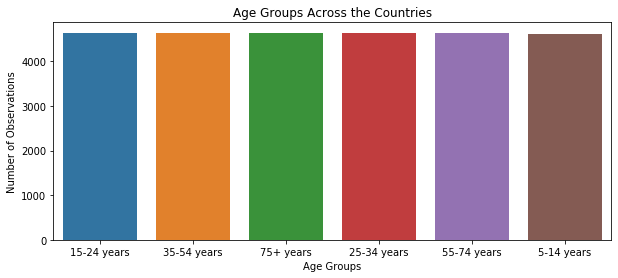

In [3]:
gdp = sns.countplot(suicide["age"])
plt.title("Age Groups Across the Countries")
gdp.set(xlabel='Age Groups', ylabel='Number of Observations')
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [4]:
suicide["age"].value_counts()

15-24 years    4642
25-34 years    4642
35-54 years    4642
75+ years      4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

#### The age groups are represented equally.

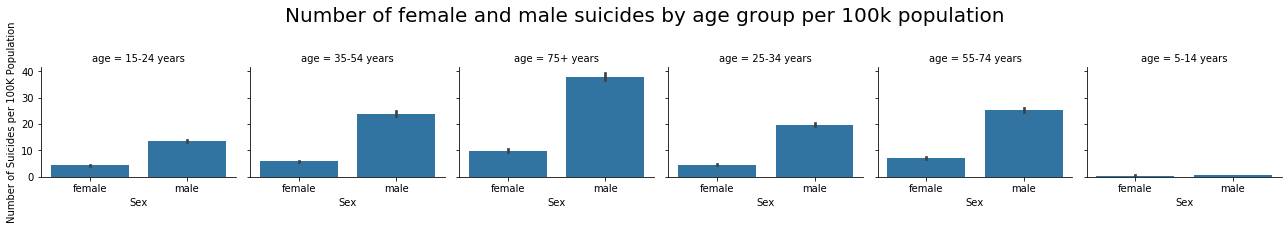

In [5]:
s = sns.FacetGrid(suicide, col="age", col_wrap=6)
s.map(sns.barplot, "sex", "suicides/100k pop", order = ['female', 'male'])
plt.subplots_adjust(top=0.7)
s.fig.suptitle('Number of female and male suicides by age group per 100k population', size = 20)
s.set_axis_labels("Sex", "Number of Suicides per 100K Population")

# <a id = "eda">EDA</a>

[Back to Table of Content](#content)

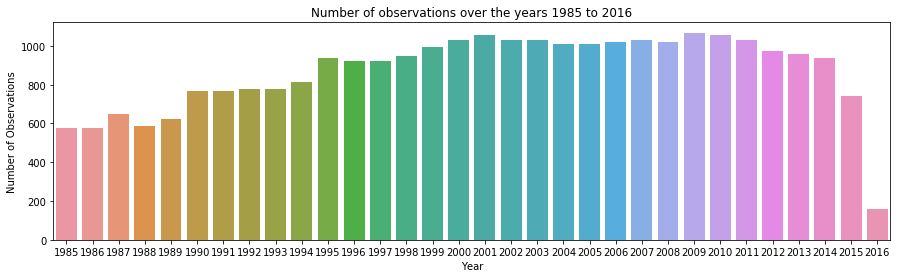

In [6]:
gdp = sns.countplot(suicide["year"])
plt.title("Number of observations over the years 1985 to 2016")
gdp.set(xlabel='Year', ylabel='Number of Observations')
fig = plt.gcf()
fig.set_size_inches(15, 4)

Text(0.5, 1.0, 'Outliers in Suicide Rate Values')

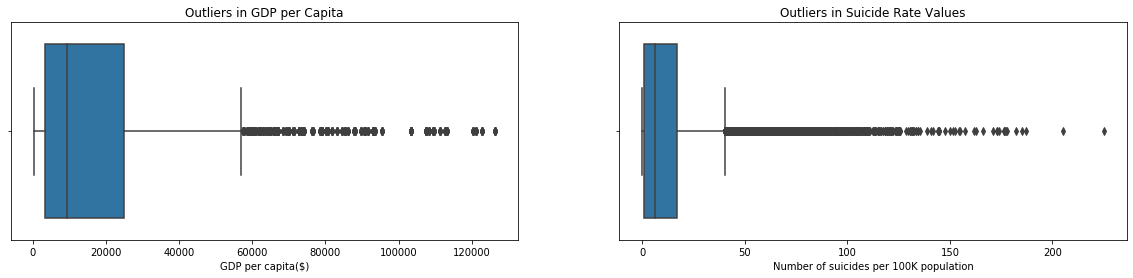

In [7]:
f = plt.figure(figsize=(20,4))
#f.add_subplot(1,2,1)
#sns.distplot(suicide['gdp_per_capita ($)'])
f.add_subplot(1,2,1)
sns.boxplot(suicide['gdp_per_capita ($)'])
plt.xlabel("GDP per capita($)")
plt.title("Outliers in GDP per Capita")
f.add_subplot(1,2,2)
sns.boxplot(suicide['suicides/100k pop'])
plt.xlabel("Number of suicides per 100K population")
plt.title("Outliers in Suicide Rate Values")

Text(0.5, 1.0, 'GDP and suicide rate distribution in the original dataset')

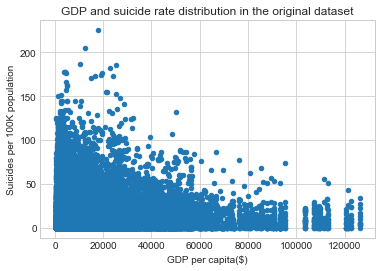

In [8]:
plt.style.use('seaborn-whitegrid')

suicide.plot.scatter(x="gdp_per_capita ($)", y='suicides/100k pop')
plt.xlabel("GDP per capita($)")
plt.ylabel("Suicides per 100K population")
plt.title("GDP and suicide rate distribution in the original dataset")

# <a id = "1">Outliers</a>

[Back to Table of Content](#content)

In [10]:
suicide1 = suicide

In [11]:
for x in ['suicides/100k pop']:
    q75,q25 = np.percentile(suicide1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    suicide1.loc[suicide1[x] < min,x] = np.nan
    suicide1.loc[suicide1[x] > max,x] = np.nan


In [12]:
for x in ["gdp_per_capita ($)"]:
    q75,q25 = np.percentile(suicide1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    suicide1.loc[suicide1[x] < min,x] = np.nan
    suicide1.loc[suicide1[x] > max,x] = np.nan

# <a id = "5">Analysis and Model: Outliers replced by max values</a>

[Back to Table of Content](#content)

In [17]:
suicide_cleaned2 = suicide1.fillna(suicide1.max())
suicide_cleaned2.drop(["HDI for year"], axis =1, inplace = True)

In [18]:
suicide_cleaned2.groupby(by='age').count()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
age,,,,,,,,,,
15-24 years,4642,4642,4642,4642,4642,4642,4642,4642,4642,4642
25-34 years,4642,4642,4642,4642,4642,4642,4642,4642,4642,4642
35-54 years,4642,4642,4642,4642,4642,4642,4642,4642,4642,4642
5-14 years,4610,4610,4610,4610,4610,4610,4610,4610,4610,4610
55-74 years,4642,4642,4642,4642,4642,4642,4642,4642,4642,4642
75+ years,4642,4642,4642,4642,4642,4642,4642,4642,4642,4642


Text(0.5, 1.0, 'GDP and suicide rate distribution without outliers')

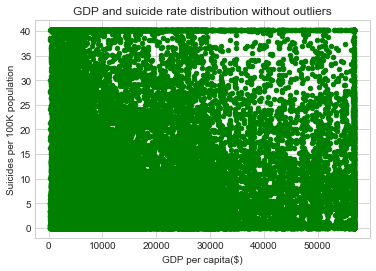

In [42]:
plt.style.use('seaborn-whitegrid')

suicide_cleaned2.plot.scatter(x="gdp_per_capita ($)", y='suicides/100k pop', color = "green")
plt.xlabel("GDP per capita($)")
plt.ylabel("Suicides per 100K population")
plt.title("GDP and suicide rate distribution without outliers")

In [43]:
np.corrcoef(suicide_cleaned2["gdp_per_capita ($)"], suicide_cleaned2["suicides/100k pop"])

array([[1.        , 0.05692887],
       [0.05692887, 1.        ]])

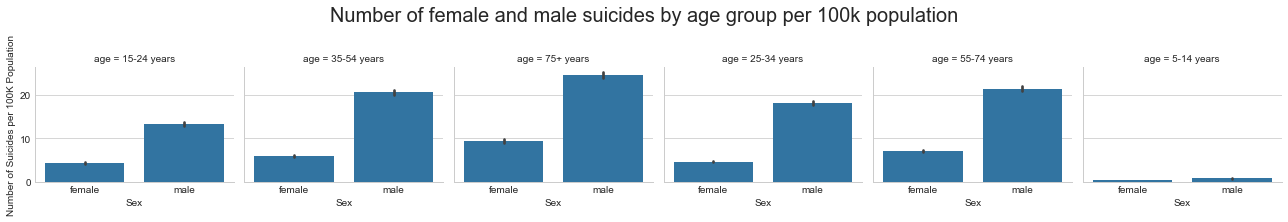

In [19]:
s = sns.FacetGrid(suicide_cleaned2, col="age", col_wrap=6)
s.map(sns.barplot, "sex", "suicides/100k pop", order = ['female', 'male'])
plt.subplots_adjust(top=0.7)
s.fig.suptitle('Number of female and male suicides by age group per 100k population', size = 20)
s.set_axis_labels("Sex", "Number of Suicides per 100K Population")

## *Steven created the following binary variables: gender, continents, risk rates, GDP and year, and to keep our analysis consistnet, I used his code:

In [20]:
suicide_cleaned2['Male'] = suicide_cleaned2.sex.apply(lambda x: 1 if x == "male" else 0) #adding binary columns for Male, 
suicide_cleaned2['Female'] = suicide_cleaned2.sex.apply(lambda x: 1 if x == "female" else 0)# Female and each age group
suicide_cleaned2['Age 5-14'] = suicide_cleaned2.age.apply(lambda x: 1 if x == "5-14 years" else 0)
suicide_cleaned2['Age 15-24'] = suicide_cleaned2.age.apply(lambda x: 1 if x == "15-24 years" else 0)
suicide_cleaned2['Age 25-34'] = suicide_cleaned2.age.apply(lambda x: 1 if x == "25-34 years" else 0)
suicide_cleaned2['Age 35-54'] = suicide_cleaned2.age.apply(lambda x: 1 if x == "35-54 years" else 0)
suicide_cleaned2['Age 55-74'] = suicide_cleaned2.age.apply(lambda x: 1 if x == "55-74 years" else 0)
suicide_cleaned2['Age 75+'] = suicide_cleaned2.age.apply(lambda x: 1 if x == "75+ years" else 0)

def get_risk(suicides_per_100k: float) -> str:
    """Given the number of suicides per 100000 people in suicides_per_100k,
    returns the relative risk level."""
    risk = ''

    if suicides_per_100k > 16.0:
        risk = 'high'
    elif 16.0 >= suicides_per_100k > 6.0:
        risk = 'moderate'
    else:
        risk = 'low'
    
    return risk
        
suicide_cleaned2['Risk'] = suicide_cleaned2['suicides/100k pop'].apply(get_risk)

def get_continent(country: str) -> str:
    """Given the name of a country, sorts country into appropriate continent.
    """
    continent = ""
    
    if country in ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                  'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
                  'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia',
                  'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States']:
        continent = 'North America'
    
    elif country in ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 
                     'Peru', 'Suriname', 'Uruguay', 'Venezuela']:
        continent = 'South America'
    
    elif country in ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 
                     'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']:
        continent = 'Australia and Oceania'
    
    elif country in ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 
                     'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 
                     'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 
                     'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
                     'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 
                     'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia',
                     'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']:
        continent = 'Europe'
        
    elif country in ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 
                     'Cambodia', 'China', 'Cyprus', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 
                     'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
                     'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines',
                    'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
                    'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 
                     'Vietnam', 'Yemen']:
        continent = 'Asia'
        
    else:
        continent = 'Africa'
    
    return continent

suicide_cleaned2['Continent'] = suicide_cleaned2['country'].apply(get_continent)

suicide_cleaned2['North America'] = suicide_cleaned2.Continent.apply(lambda x: 1 if x == "North America" else 0)
suicide_cleaned2['South America'] = suicide_cleaned2.Continent.apply(lambda x: 1 if x == "South America" else 0)
suicide_cleaned2['Europe'] = suicide_cleaned2.Continent.apply(lambda x: 1 if x == "Europe" else 0)
suicide_cleaned2['Asia'] = suicide_cleaned2.Continent.apply(lambda x: 1 if x == "Asia" else 0)
suicide_cleaned2['Australia and Oceania'] = suicide_cleaned2.Continent.apply(lambda x: 1 if x == "Australia and Oceania" else 0)
suicide_cleaned2['Africa'] = suicide_cleaned2.Continent.apply(lambda x: 1 if x == "Africa" else 0)

def get_risk_binary(suicides_per_100k: float) -> int:
    """Given the number of suicides per 100000 people in suicides_per_100k,
    returns the risk level in a binary format."""
    risk = ''
    if suicides_per_100k >= 6.0:
        risk = 1
    else:
        risk = 0
    
    return risk
suicide_cleaned2['Risk_binary'] = suicide_cleaned2['suicides/100k pop'].apply(get_risk_binary)

In [27]:
suicide_numeric2 = suicide_cleaned2.drop(["country", "sex", "age", "country-year", "generation","Risk", "Continent"], axis = 1)

In [32]:
suicide_numeric2 = suicide_numeric2.drop(suicide_numeric2.columns[4],axis=1)

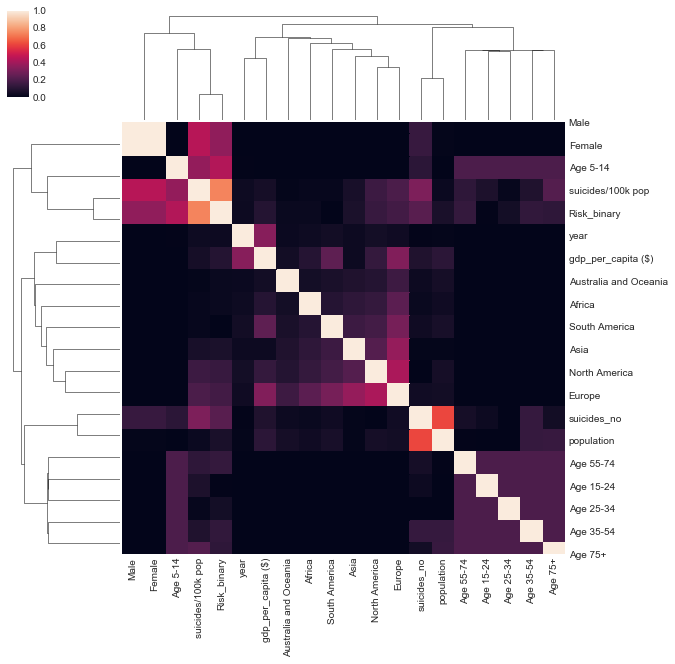

In [34]:
suic_corr = abs(suicide_numeric2.corr())
sns.clustermap(suic_corr)

In [35]:
suicide_num2 = suicide_numeric2.drop(["suicides/100k pop","Female", "population"],axis=1)

In [37]:
def get_gdp_binary(gdp_per_capita: float) -> int:
    
    gdp = ''
    if gdp_per_capita >= 9372.0:
        gdp = 1
    else:
        gdp = 0
    
    return gdp
suicide_num2['gdp_binary'] = suicide_cleaned2['gdp_per_capita ($)'].apply(get_gdp_binary)

In [38]:
suicide_num2 = suicide_num2.drop(["year","suicides_no"], axis = 1)

In [40]:
suicide_num2.drop(suicide_num2.columns[0],axis=1, inplace = True)

In [47]:
def get_year(year: int) -> int:

    if year > 2008:
        year = 1
    else:
        year = 0
    
    return year
suicide_num2['year_binary'] = suicide_cleaned2["year"].apply(get_year)   

# Plotting binary values to check for balance

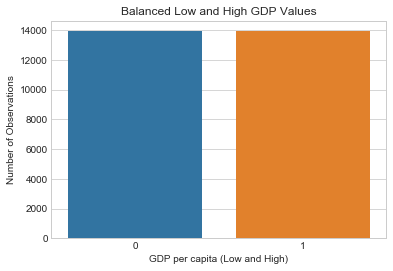

In [44]:
#balanced datasets
gdp = sns.countplot(suicide_num2["gdp_binary"])#, color = sns.color_palette("pastel"))
plt.title("Balanced Low and High GDP Values")
gdp.set(xlabel='GDP per capita (Low and High)', ylabel='Number of Observations')
plt.show()

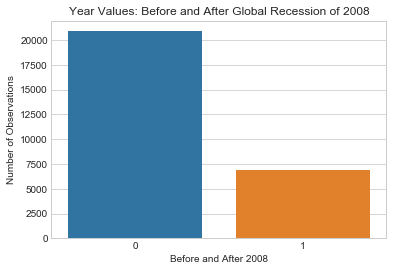

In [48]:
#balanced datasets
gdp = sns.countplot(suicide_num2["year_binary"])#, color = sns.color_palette("pastel"))
plt.title("Year Values: Before and After Global Recession of 2008")
gdp.set(xlabel='Before and After 2008', ylabel='Number of Observations')
plt.show()

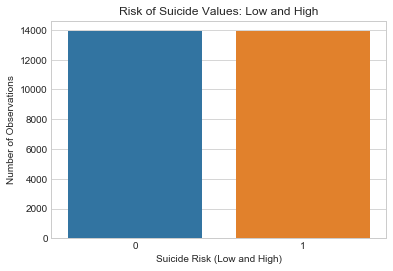

In [46]:
gdp = sns.countplot(suicide_num2["Risk_binary"])#, color = sns.color_palette("pastel"))
plt.title("Risk of Suicide Values: Low and High")
gdp.set(xlabel='Suicide Risk (Low and High)', ylabel='Number of Observations')
plt.show()

## <a id = "LRrisk">Logistic Regression Classifier to Predict Risk of Suicide</a>

[Back to Table of Content](#content)

In [49]:
sglm_train2, sglm_test2 = train_test_split(suicide_num2, test_size = 0.30)
s_metrics_train2 = pd.DataFrame(sglm_train2, columns = ["gdp_binary"])
s_metrics_test2 = pd.DataFrame(sglm_test2, columns = ["gdp_binary"])
s_target_train2 = pd.DataFrame(sglm_train2, columns = ["Risk_binary"])
s_target_test2 = pd.DataFrame(sglm_test2, columns = ["Risk_binary"])
s_glm2 = linear_model.LogisticRegression(random_state=0, max_iter = 100, solver = 'liblinear')
s_glm2.fit(s_metrics_train2, s_target_train2)
s_predictions2 = s_glm2.predict(s_metrics_test2)
print(confusion_matrix(s_target_test2, s_predictions2))
print(classification_report(s_target_test2, s_predictions2))

[[2298 1909]
 [1925 2214]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4207
           1       0.54      0.53      0.54      4139

    accuracy                           0.54      8346
   macro avg       0.54      0.54      0.54      8346
weighted avg       0.54      0.54      0.54      8346



/Users/aselkushkeyeva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
logit_roc_auc = roc_auc_score(s_target_test2, s_predictions2)
print(logit_roc_auc)

0.5405721420706513


In [52]:
fpr, tpr, thresholds = roc_curve(s_target_test2, s_predictions2)

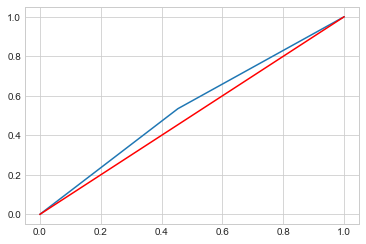

In [53]:
plt.plot(fpr, tpr)
plt.plot([0,1], "r")

## <a id = "knnmax">KNN to predict risk of suicide by GDP (outliers replaced by maximum values)</a>

[Back to Table of Content](#content)

In [54]:
from sklearn.model_selection import train_test_split
features = suicide_num2.drop(["Risk_binary"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features,suicide_cleaned2['Risk_binary'],
                                                    test_size=0.30)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [56]:
pred = knn.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[3044 1090]
 [ 901 3311]]


In [58]:
print('WITH K=1')
print('\n')
print(classification_report(y_test,pred))

WITH K=1


              precision    recall  f1-score   support

           0       0.77      0.74      0.75      4134
           1       0.75      0.79      0.77      4212

    accuracy                           0.76      8346
   macro avg       0.76      0.76      0.76      8346
weighted avg       0.76      0.76      0.76      8346



## <a id = "bestk2">Finding Best K for RQ2</a>

[Back to Table of Content](#content)

In [303]:
error_rate = []
# Takes some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

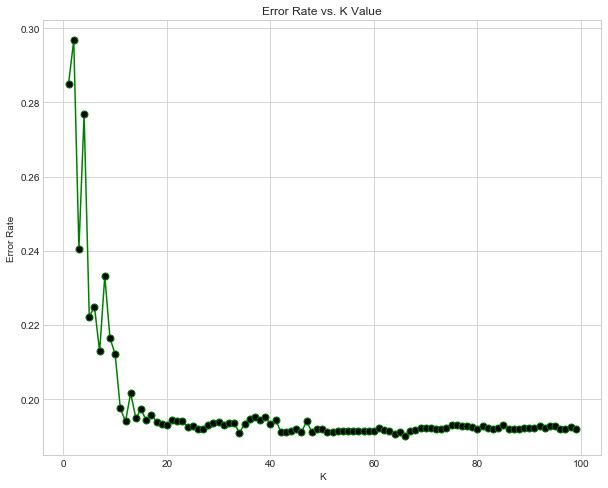

In [100]:
plt.figure(figsize=(10,8))
plt.plot(range(1,100),error_rate,color='green', marker = "o",
         markerfacecolor='black', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [321]:
# NOW WITH K=50
knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=50')
print('\n')
print(classification_report(y_test,pred))

WITH K=50


              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4150
           1       0.80      0.84      0.82      4196

    accuracy                           0.81      8346
   macro avg       0.81      0.81      0.81      8346
weighted avg       0.81      0.81      0.81      8346



# <a id = "rq4logreg">Research Question 4: Predicting Risk of Suicides by Year</a>

[Back to Table of Content](#content)

## Logistic Regression Classifier

In [59]:
sglm_train4, sglm_test4 = train_test_split(suicide_num2, test_size = 0.30)
s_metrics_train4 = pd.DataFrame(sglm_train4, columns = ["Male","Age 5-14", "Age 15-24", "Age 25-34", "Age 35-54", "Age 55-74", "Age 75+", "North America", "South America", "Europe", "Asia", "Australia and Oceania", "Africa", "gdp_binary", "year_binary"])
s_metrics_test4 = pd.DataFrame(sglm_test4, columns = ["Male","Age 5-14", "Age 15-24", "Age 25-34", "Age 35-54", "Age 55-74", "Age 75+","North America", "South America", "Europe", "Asia", "Australia and Oceania", "Africa", "gdp_binary","year_binary"])
s_target_train4 = pd.DataFrame(sglm_train4, columns = ["Risk_binary"])
s_target_test4 = pd.DataFrame(sglm_test4, columns = ["Risk_binary"])
s_glm4 = linear_model.LogisticRegression(random_state=0, max_iter = 100, solver = 'liblinear')
s_glm4.fit(s_metrics_train4, s_target_train4)
s_predictions4 = s_glm4.predict(s_metrics_test4)
print(confusion_matrix(s_target_test4, s_predictions4))
print(classification_report(s_target_test4, s_predictions4))

[[3194  968]
 [ 678 3506]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      4162
           1       0.78      0.84      0.81      4184

    accuracy                           0.80      8346
   macro avg       0.80      0.80      0.80      8346
weighted avg       0.80      0.80      0.80      8346



/Users/aselkushkeyeva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
logit_roc_auc = roc_auc_score(s_target_test4, s_predictions4)
print(logit_roc_auc)

0.8026868103748473


In [61]:
fpr, tpr, thresholds = roc_curve(s_target_test4, s_predictions4)

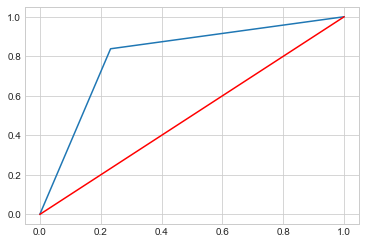

In [62]:
plt.plot(fpr, tpr)
plt.plot([0,1], "r")

## <a id = "FS4">Feature Selection</a>

[Back to Table of Content](#content)

In [63]:
train_data4 = sglm_train4.drop(["Risk_binary"], axis = 1)

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
selector = SelectFromModel(estimator=LogisticRegression()).fit(train_data4, s_target_train4)
selector.estimator_.coef_

/Users/aselkushkeyeva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aselkushkeyeva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.20744024, -5.46317758,  0.24972632,  0.57886702,  1.10524799,
         1.15863543,  1.02459418, -1.05188311,  0.02349458,  0.54594509,
        -0.57977129,  0.11547552, -0.39936742,  0.33074205, -0.37497776]])

In [65]:
selector.threshold_

1.0139563730328154

In [66]:
selector.get_support()

array([ True,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False])

In [ ]:
# "Male","Age 5-14", "Age 35-54", "Age 55-74", "Age 75+", "North America"

## Running logistic regression with the selected features

In [67]:
sglm_train4, sglm_test4 = train_test_split(suicide_num2, test_size = 0.30)
s_metrics_train4 = pd.DataFrame(sglm_train4, columns = ["Male","Age 5-14", "Age 35-54", "Age 55-74", "Age 75+", "North America"])
s_metrics_test4 = pd.DataFrame(sglm_test4, columns = ["Male","Age 5-14", "Age 35-54", "Age 55-74", "Age 75+", "North America"])
s_target_train4 = pd.DataFrame(sglm_train4, columns = ["Risk_binary"])
s_target_test4 = pd.DataFrame(sglm_test4, columns = ["Risk_binary"])
s_glm4 = linear_model.LogisticRegression(random_state=0, max_iter = 100, solver = 'liblinear')
s_glm4.fit(s_metrics_train4, s_target_train4)
s_predictions4 = s_glm4.predict(s_metrics_test4)
print(confusion_matrix(s_target_test4, s_predictions4))
print(classification_report(s_target_test4, s_predictions4))

[[3526  640]
 [1361 2819]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      4166
           1       0.81      0.67      0.74      4180

    accuracy                           0.76      8346
   macro avg       0.77      0.76      0.76      8346
weighted avg       0.77      0.76      0.76      8346



/Users/aselkushkeyeva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
logit_roc_auc = roc_auc_score(s_target_test4, s_predictions4)
print(logit_roc_auc)

0.7603886669714044


In [69]:
fpr, tpr, thresholds = roc_curve(s_target_test4, s_predictions4)

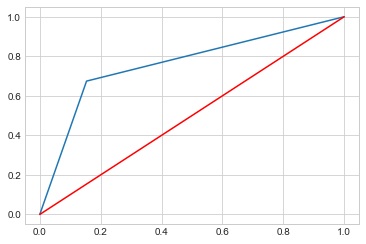

In [70]:
plt.plot(fpr, tpr)
plt.plot([0,1], "r")

[Back to Table of Content](#content)

# <a id = "KNN4">KNN - RQ4</a>

In [93]:
from sklearn.model_selection import train_test_split
features = suicide_num2.drop(["Risk_binary"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features,suicide_numeric2['Risk_binary'],
                                                    test_size=0.30)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [95]:
pred = knn.predict(X_test)

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[2968 1195]
 [1028 3155]]


In [97]:
print('WITH K=1')
print('\n')
print(classification_report(y_test,pred))

WITH K=1


              precision    recall  f1-score   support

           0       0.74      0.71      0.73      4163
           1       0.73      0.75      0.74      4183

    accuracy                           0.73      8346
   macro avg       0.73      0.73      0.73      8346
weighted avg       0.73      0.73      0.73      8346



# <a id = "bestk4">Finding Best K for RQ4</a>

[Back to Table of Content](#content)

In [82]:
error_rate = []
# Takes some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

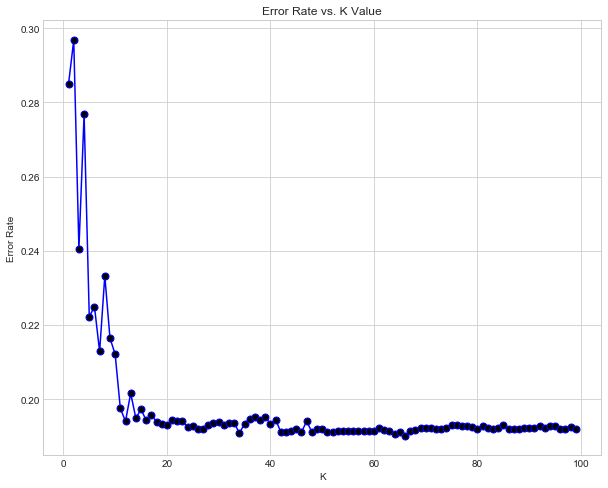

In [101]:
plt.figure(figsize=(10,8))
plt.plot(range(1,100),error_rate,color='blue', marker = "o",
         markerfacecolor='black', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [99]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(classification_report(y_test,pred))

WITH K=20


              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4163
           1       0.79      0.82      0.81      4183

    accuracy                           0.80      8346
   macro avg       0.80      0.80      0.80      8346
weighted avg       0.80      0.80      0.80      8346

